# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 7: Stock Market Prediction using Numerical and Textual Analysis

### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

### 1. Importing the required header files 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader
from datetime import datetime

### 2. Reading the stock data

In [ ]:
# Download historical stock prices from finance.yahoo.com

# The tech stocks we'll use for this analysis
stock = 'GOOG'

# Set up End and Start times for data grab (In our case, 3 years stock data)
start = datetime(2018, 1, 1, 0, 0, 0, 0)
end = datetime(2020, 12, 31, 0, 0, 0, 0)

#Getting stock data from yahoo of Google company for last 3 years 
globals()[stock] = DataReader(stock, 'yahoo', start, end)
stock = GOOG.copy()

#Displaying dataframe shape and few records
print(stock.shape)
stock.head()

(756, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941


### 3. Analysis on the stock data

#### Change in price of the stock overtime

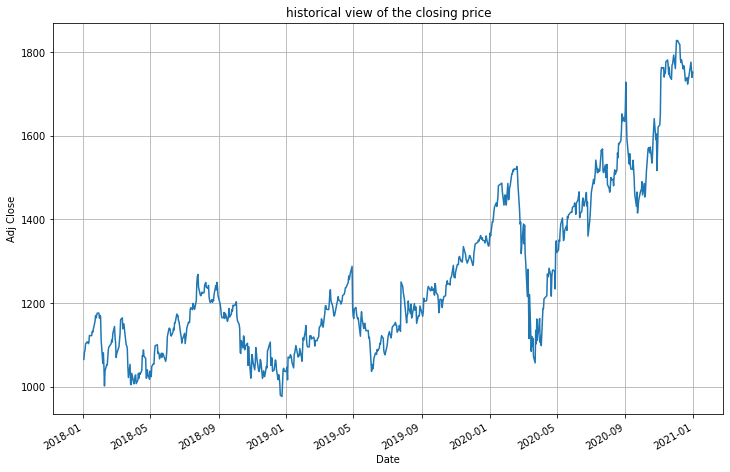

In [ ]:
#Let's see a historical view of the closing price

plt.figure(figsize=(12, 8))
stock['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.grid()
plt.title('historical view of the closing price')
plt.show()

* We can see closing price of stock for each day.

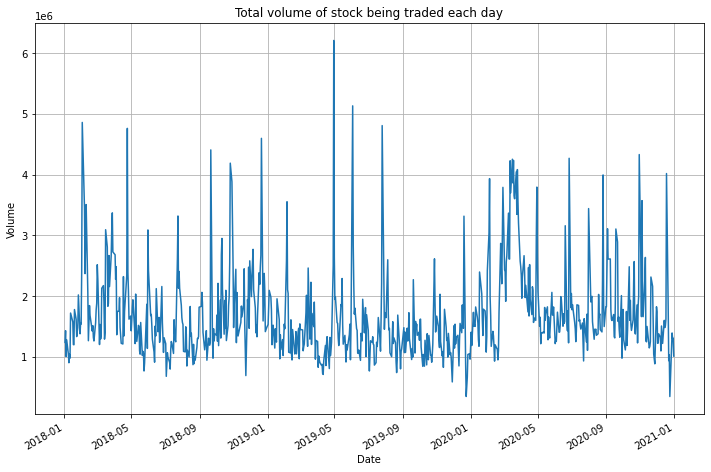

In [ ]:
#Let's plot the total volume of stock being traded each day

plt.figure(figsize=(12, 8))
stock['Volume'].plot()
plt.grid()
plt.ylabel('Volume')
plt.title('Total volume of stock being traded each day')
plt.show()

* The above graph shows total volume of stock being traded each day.

#### Moving average of the stock

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and calculate the moving average for the stock.

The moving average is calculated by adding a stock's prices over a certain period and dividing the sum by the total number of periods.

A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.

In [ ]:
#We'll calculate movig average of stocks for 10,20 & 30 days
mov_avg_day = [10, 20, 30]

for ma in mov_avg_day:
  column_name = f"mov_avg for {ma} days"
  stock[column_name] = stock['Adj Close'].rolling(ma).mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05a4150e10>,
      dtype=object)

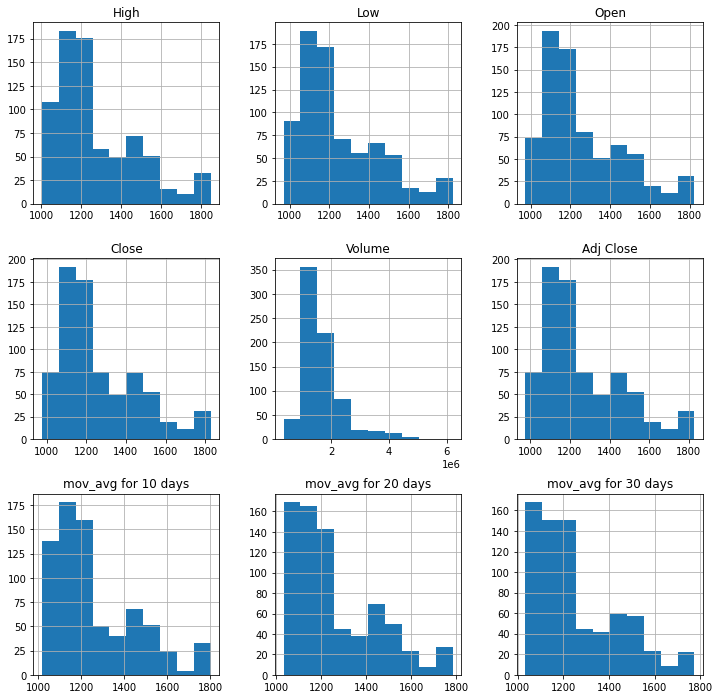

In [ ]:
#plotting all the additional Moving Averages
stock.hist(figsize=(12, 12))

In [ ]:
#stock dataframe with added moving averages
stock

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days
Date,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666


<Figure size 864x576 with 0 Axes>

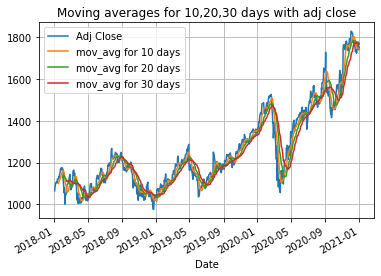

In [ ]:
#Plotting moving averages for 10,20,30 days with adj close

plt.figure(figsize=(12, 8))
stock[['Adj Close', 'mov_avg for 10 days', 'mov_avg for 20 days', 'mov_avg for 30 days']].plot()
plt.title('Moving averages for 10,20,30 days with adj close')
plt.grid()
plt.show()

#### Daily return of the stock on average

In [ ]:
# We'll use pct_change to find the percent change in stock for each day
stock['Daily Return'] = stock['Adj Close'].pct_change()

In [ ]:
#stock dataframe with added Daily return in stock
stock

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return
Date,,,,,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000,NaN,NaN,NaN,NaN
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980,NaN,NaN,NaN,0.016413
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024,NaN,NaN,NaN,0.003621
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980,NaN,NaN,NaN,0.014571
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941,NaN,NaN,NaN,0.004273
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780


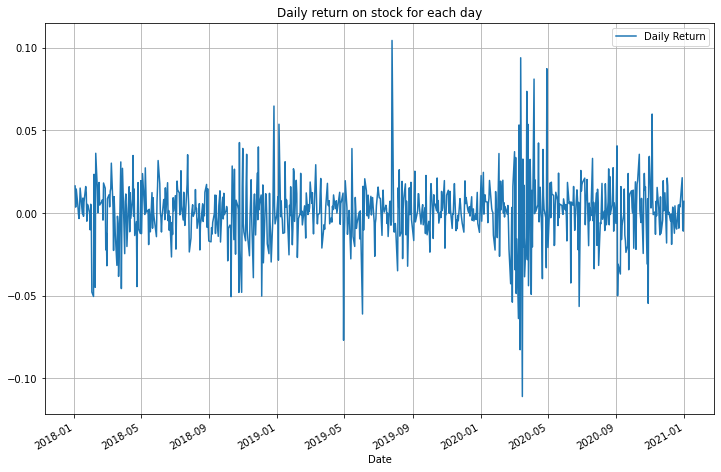

In [ ]:
#Plotting the daily return percentage of stock for each day

plt.figure(figsize=(12, 8))
stock['Daily Return'].plot(legend=True)
plt.title('Daily return on stock for each day')
plt.grid()
plt.show()

### 4. Reading the news data

In [ ]:
#Reading data(source: https://bit.ly/36fFPI6)

news = pd.read_csv('india-news-headlines.csv')

print(news.shape)
news.head()

(3424067, 3)


,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


### 5. Analysis on the news data

In [ ]:
#Dropping headline_category
news.drop('headline_category', axis = 1, inplace=True)

#Changing the date format for column publish_date
news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y%m%d')

#Renaming the column publish_date as Date
news.rename(columns={'publish_date':'Date'}, inplace=True)

news

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [ ]:
#Grouping the headlines for each day

news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news.drop_duplicates(subset='Date', keep='first', inplace=True)
news.reset_index(inplace = True, drop = True)
news

,Date,headline_text,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to India,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class,Light combat craft takes India into club class...
...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,Numerology Readings 30 December 2020: Predicti...


In [ ]:
#Dropping headline_text column
news.drop('headline_text', axis = 1, inplace=True)

#Setting Date column as index
news.set_index("Date", inplace = True)

news

,News
Date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,Powerless north India gropes in the dark Think...
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [ ]:
#Getting new data only for our stock data Dates
temp = news['News'].loc[str(stock.index[0])[:10] : str(stock.index[-1])[:10]]

#Creating dataframe with stock data dates only
news_3yrs = pd.DataFrame(temp)

news_3yrs

,News
Date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


In [ ]:
#Dropping NA values
news_3yrs.dropna(inplace=True)

In [ ]:
#importing some packages for data cleaning and sentiment analysis

import nltk
import re
from tqdm import tqdm
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Cleaning headlines

c = []
for i in tqdm(range(len(news_3yrs['News']))):
    temp = re.sub('[^a-zA-Z]',' ', news_3yrs['News'][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in set(stopwords.words('english'))]
    temp=' '.join(temp)
    c.append(temp)

100%|██████████| 732/732 [07:28<00:00,  1.63it/s]


In [ ]:
news_3yrs['News'] = c
news_3yrs

,News
Date,
2018-12-31,dumping ground gets makeover tree plantation d...
2019-01-01,guilty making fashion faux pas happy new year ...
2019-01-02,new animal birth centre sterilize dogs day fat...
2019-01-03,music director harris jayaraj scored highest m...
2019-01-04,gate admit card released gate iitm ac check di...
...,...
2020-12-27,biginterview dhritiman chatterjee nobody dares...
2020-12-28,horoscope today december check astrological pr...
2020-12-29,man recovers charred remains thief burnt shop ...


In [ ]:
#Merging stock and news_3yrs dataframe on Date column
data = pd.merge(stock, news_3yrs, how ='inner', on ='Date')

#Dropping na values if any
data.dropna()

data

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return,News
Date,,,,,,,,,,,
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985,1018.944983,1040.270996,1043.547664,-0.001417,dumping ground gets makeover tree plantation d...
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976,1021.876978,1037.841992,1042.918998,0.009888,new animal birth centre sterilize dogs day fat...
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998,1020.611981,1033.323489,1041.404665,-0.028484,music director harris jayaraj scored highest m...
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961,1025.381976,1034.317990,1043.094997,0.053786,gate admit card released gate iitm ac check di...
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015,1031.279980,1034.300992,1044.515997,-0.002167,bus hits footbridge near iffco chowk close sha...
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735,set mood sex cold winters two houses blow guja...
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416,horoscope today december check astrological pr...
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780,man recovers charred remains thief burnt shop ...


In [ ]:
#Storing merged dataframe to csv file for later use
data.to_csv('stock_news_final_data.csv')

In [ ]:
#Functions to get the subjectivity and polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
data['Subjectivity'] = data['News'].apply(getSubjectivity)
data['Polarity'] = data['News'].apply(getPolarity)

In [ ]:
#Adding sentiment score to data

sia = SentimentIntensityAnalyzer()

data['Compound'] = [sia.polarity_scores(v)['compound'] for v in data['News']]
data['Negative'] = [sia.polarity_scores(v)['neg'] for v in data['News']]
data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in data['News']]
data['Positive'] = [sia.polarity_scores(v)['pos'] for v in data['News']]

In [ ]:
#data with added sentiment scores
data

,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,,,,,,,,,,,
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985,1018.944983,1040.270996,1043.547664,-0.001417,dumping ground gets makeover tree plantation d...,0.406238,0.050870,-0.9997,0.169,0.703,0.128
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976,1021.876978,1037.841992,1042.918998,0.009888,new animal birth centre sterilize dogs day fat...,0.417254,0.046267,-0.9997,0.171,0.715,0.114
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998,1020.611981,1033.323489,1041.404665,-0.028484,music director harris jayaraj scored highest m...,0.393736,0.019841,-0.9998,0.179,0.726,0.095
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961,1025.381976,1034.317990,1043.094997,0.053786,gate admit card released gate iitm ac check di...,0.385002,0.056757,-0.9999,0.177,0.729,0.094
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015,1031.279980,1034.300992,1044.515997,-0.002167,bus hits footbridge near iffco chowk close sha...,0.417741,0.036136,-0.9999,0.203,0.705,0.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735,set mood sex cold winters two houses blow guja...,0.379621,0.046262,-0.9994,0.143,0.748,0.109
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416,horoscope today december check astrological pr...,0.400613,0.043856,-0.9995,0.144,0.752,0.105
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780,man recovers charred remains thief burnt shop ...,0.414258,0.047545,-0.9997,0.160,0.735,0.105


In [ ]:
#Dropping News column which contains textual info about news
data.drop('News', axis = 1, inplace=True)

#Storing dataframe to csv file for later use
data.to_csv('stock_news_final_data.csv')

In [ ]:
data

,Date,High,Low,Open,Close,Volume,Adj Close,mov_avg for 10 days,mov_avg for 20 days,mov_avg for 30 days,Daily Return,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985,1018.944983,1040.270996,1043.547664,-0.001417,0.406238,0.050870,-0.9997,0.169,0.703,0.128
1,2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976,1021.876978,1037.841992,1042.918998,0.009888,0.417254,0.046267,-0.9997,0.171,0.715,0.114
2,2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998,1020.611981,1033.323489,1041.404665,-0.028484,0.393736,0.019841,-0.9998,0.179,0.726,0.095
3,2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961,1025.381976,1034.317990,1043.094997,0.053786,0.385002,0.056757,-0.9999,0.177,0.729,0.094
4,2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015,1031.279980,1034.300992,1044.515997,-0.002167,0.417741,0.036136,-0.9999,0.203,0.705,0.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976,1748.561011,1775.891998,1770.809668,0.003735,0.379621,0.046262,-0.9994,0.143,0.748,0.109
502,2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000,1776.089966,1747.993005,1775.037000,1771.684668,0.021416,0.400613,0.043856,-0.9995,0.144,0.752,0.105
503,2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400,1758.719971,1747.858997,1774.935999,1771.074666,-0.009780,0.414258,0.047545,-0.9997,0.160,0.735,0.105
504,2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100,1739.520020,1745.033997,1772.007001,1769.679333,-0.010917,0.437580,0.039508,-0.9998,0.165,0.739,0.096


### 6. Prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

In [ ]:
#Picking only required columns

df = data[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,1035.609985,0.406238,0.050870,-0.9997,0.169,0.703,0.128
1,1045.849976,0.417254,0.046267,-0.9997,0.171,0.715,0.114
2,1016.059998,0.393736,0.019841,-0.9998,0.179,0.726,0.095
3,1070.709961,0.385002,0.056757,-0.9999,0.177,0.729,0.094
4,1068.390015,0.417741,0.036136,-0.9999,0.203,0.705,0.092
...,...,...,...,...,...,...,...
501,1738.849976,0.379621,0.046262,-0.9994,0.143,0.748,0.109
502,1776.089966,0.400613,0.043856,-0.9995,0.144,0.752,0.105
503,1758.719971,0.414258,0.047545,-0.9997,0.160,0.735,0.105
504,1739.520020,0.437580,0.039508,-0.9998,0.165,0.739,0.096


In [ ]:
#x and y for training and test

x = df.drop('Close', axis=1)
y = df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mimasc = MinMaxScaler()
y = mimasc.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
#Preparing train and test data
#Since it is a time series data, so splitting data in series only

x_train = x[:int(x.shape[0] * 0.8)]
y_train = y[:int(y.shape[0] * 0.8)]

x_test = x[int(x.shape[0] * 0.8):]
y_test = y[int(y.shape[0] * 0.8):]

#### Training DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#mean_absolute_error is one of the ideal metric for regression task although there is no optimal value for it.
#But the balance between train and test error should be there in MAE to avoid
#underfitting(very high MSE for test/validation/unseen data) and overfitting(very low MSE for training data).

from sklearn.metrics import mean_absolute_error,mean_squared_error

print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(dt.predict(x_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(dt.predict(x_train), y_train))
print()
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(dt.predict(x_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(dt.predict(x_test), y_test))

Mean Absolute Error (MAE) for train data: 3.2622074338336118e-06
Mean Squared Error (MAE) for train data: 7.350902352405165e-10

Mean Absolute Error (MAE) for test data: 0.44011877714968933
Mean Squared Error (MAE) for test data: 0.24167597811235744


Lets do hyper-parameter tuning on model to find optimal parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

para = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7,8,9,10]}
dt_cv = GridSearchCV(dt, para, n_jobs=-1)
dt_cv.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
      

In [ ]:
#Best hyper-parameter
dt_cv.best_params_

{'max_depth': 1, 'min_samples_split': 6}

In [ ]:
print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(dt_cv.predict(x_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(dt_cv.predict(x_train), y_train))
print()
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(dt_cv.predict(x_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(dt_cv.predict(x_test), y_test))

Mean Absolute Error (MAE) for train data: 0.13538497776323882
Mean Squared Error (MAE) for train data: 0.02589836214140769

Mean Absolute Error (MAE) for test data: 0.4420291248018572
Mean Squared Error (MAE) for test data: 0.223252891532258


#### Training XGBRegressor

In [ ]:
import xgboost 

xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[20:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#mean_absolute_error is one of the ideal metric for regression task although there is no optimal value for it.
#But the balance between train and test error should be there in MAE to avoid
#underfitting(very high MSE for test/validation/unseen data) and overfitting(very low MSE for training data).

from sklearn.metrics import mean_absolute_error,mean_squared_error

print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(xgb.predict(x_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(xgb.predict(x_train), y_train))
print()
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(xgb.predict(x_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(xgb.predict(x_test), y_test))

Mean Absolute Error (MAE) for train data: 0.0871019490734185
Mean Squared Error (MAE) for train data: 0.011464548229878559

Mean Absolute Error (MAE) for test data: 0.4276909871358133
Mean Squared Error (MAE) for test data: 0.21367968717479274


Lets do hyper-parameter tuning on model to find optimal parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

para = {'max_depth':[3,5,7,10,12],'min_samples_split':[2,3,4,5,6,7,8],'n_estimators':[20,40,60,80,100,125,150]}
xgb_cv = GridSearchCV(xgb, para, n_jobs=-1)
xgb_cv.fit(x_train, y_train)

[20:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 12],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
     

In [ ]:
#Best hyper-parameter
xgb_cv.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 40}

In [ ]:
print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(xgb_cv.predict(x_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(xgb_cv.predict(x_train), y_train))
print()
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(xgb_cv.predict(x_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(xgb_cv.predict(x_test), y_test))

Mean Absolute Error (MAE) for train data: 0.10712439429515784
Mean Squared Error (MAE) for train data: 0.01651605280210218

Mean Absolute Error (MAE) for test data: 0.4226577021330047
Mean Squared Error (MAE) for test data: 0.20806195412570552


* We can see XGBoost model performance is slightly better than DecisionTree model.

#### Prediction with best model (XGBoost)

In [ ]:
pred = xgb_cv.predict(x_test)
print('Actual stock closing prices\t\tPredicted stock closing price')
print('-'*70)
for i, j in zip(mimasc.inverse_transform(pred[:10].reshape(-1,1)), mimasc.inverse_transform(y_test[:10:].reshape(-1,1))):
  print(i[0],'\t\t\t\t',j[0])

Actual stock closing prices		Predicted stock closing price
----------------------------------------------------------------------
1249.8733 				 1494.489990234375
1313.1699 				 1496.0999755859375
1249.9435 				 1480.3199462890625
1251.0414 				 1506.6199951171875
1215.2299 				 1518.449951171875
1361.6754 				 1507.72998046875
1299.1172 				 1517.97998046875
1273.6163 				 1558.5999755859375
1407.1862 				 1547.530029296875
1353.5428 				 1581.75


* We can observe, the stock closing price is not same but very close to actual closing price.

### 7. Conclusion

* We've analyzed historical stock data to get some insight about it.
* We've also analyzed Indian news headline data.
* Did sentiment analysis on textual data of Indian news.
* Created model for prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
* Experimented with decision tree and xgboost model for stock closing price prediction and also did hyper-parameter tuning on model to find it's best parameters.
* The performance of xgboost model was slightly better than decision tree.
* Currently we've limited the scope to experiment with only these 2 models.
* For better result we can experiment with more machine learning models.
* Using LSTM and RNN will give more accurate predictions because it is capable of learning order dependence in sequence prediction problems and works best for time series data.
